In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
import folium
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_df.csv')
df

,Season,Date,hour,Stadium,latitude,longitude,HomeTeam,AwayTeam,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,is_top_match,has_min_one_top_club,had_extreme_weather,Attendance_percentage
0,2017_18,2017-11-04,15,John Smith's Stadium,53.654170,-1.76833,Huddersfield Town,West Bromwich Albion,1,0,1,11,14,0,0,0,98.65
1,2017_18,2017-11-04,15,St James' Park,54.975560,-1.62167,Newcastle United,AFC Bournemouth,1,0,0,9,19,0,0,0,99.81
2,2017_18,2017-11-04,15,St Mary's Stadium,50.905830,-1.39111,Southampton,Burnley,1,0,0,9,7,0,0,1,94.15
3,2017_18,2017-11-04,15,Swansea.com Stadium,51.642780,-3.93472,Swansea City,Brighton & Hove Albion,1,0,1,17,12,0,0,1,98.74
4,2017_18,2017-11-04,17,London Stadium,51.538610,-0.01639,West Ham United,Liverpool,1,0,0,16,6,0,1,0,91.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2023_24,2024-03-30,20,Gtech Community Stadium,51.490825,-0.28870,Brentford,Manchester United,1,0,0,16,6,0,1,0,99.35
753,2023_24,2024-03-30,15,Bramall Lane,53.370280,-1.47083,Sheffield United,Fulham,1,0,0,19,12,0,0,0,91.77
754,2023_24,2024-03-30,15,Tottenham Hotspur Stadium,51.604720,-0.06639,Tottenham Hotspur,Luton Town,1,0,0,5,18,0,1,0,97.91
755,2023_24,2024-03-31,14,Anfield,53.430830,-2.96083,Liverpool,Brighton & Hove Albion,1,1,0,2,8,0,1,0,98.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 757 non-null    object 
 1   Date                   757 non-null    object 
 2   hour                   757 non-null    int64  
 3   Stadium                757 non-null    object 
 4   latitude               757 non-null    float64
 5   longitude              757 non-null    float64
 6   HomeTeam               757 non-null    object 
 7   AwayTeam               757 non-null    object 
 8   is_weekend             757 non-null    int64  
 9   is_holiday             757 non-null    int64  
 10  is_close_match         757 non-null    int64  
 11  HomeTeam_position      757 non-null    int64  
 12  AwayTeam_position      757 non-null    int64  
 13  is_top_match           757 non-null    int64  
 14  has_min_one_top_club   757 non-null    int64  
 15  had_ex

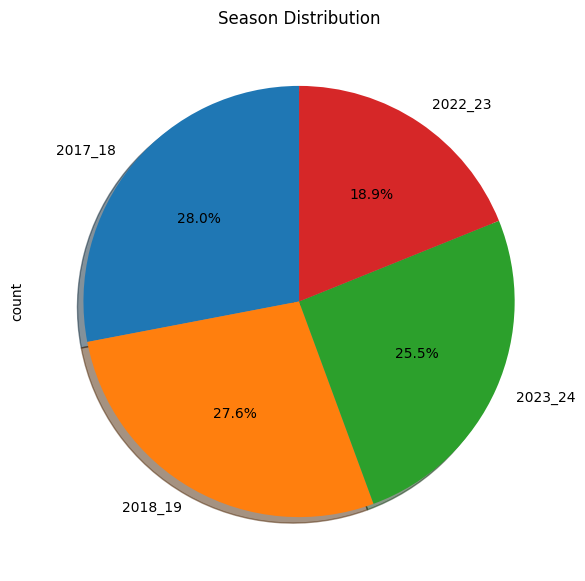

In [28]:
# seasons pie chart plot using sns
df['Season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(10, 7))
plt.title('Season Distribution')
plt.show()

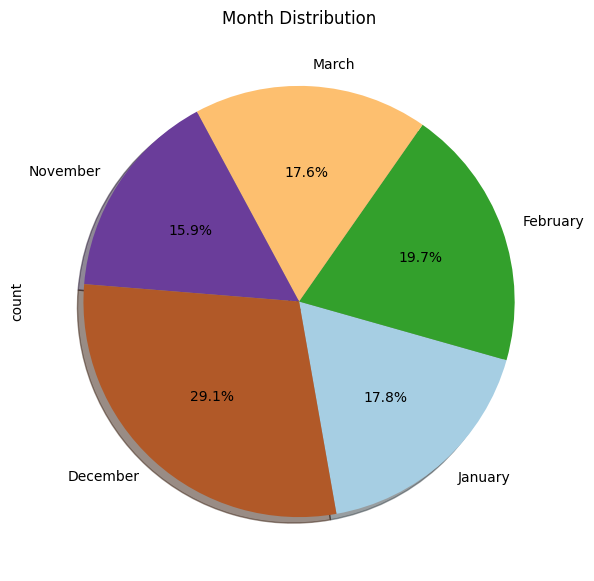

In [29]:
# Extract the month from the date column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month Name'] = pd.DatetimeIndex(df['Date']).month_name()
count_df = df['Month'].value_counts().sort_index()
#change the index to month name
count_df.index = count_df.index.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
count_df.plot(kind='pie', autopct='%1.1f%%', startangle=280, shadow=True, figsize=(10, 7), cmap='Paired')
plt.title('Month Distribution')
plt.show()

In [21]:
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add markers for each point in the data
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['Stadium']  # Optional: add a popup with the location name
    ).add_to(m)

# Display map
m

In [35]:
df['is_top_match'].value_counts()

is_top_match
0    696
1     61
Name: count, dtype: int64

In [6]:
df[df['has_min_one_top_club'] == 1]

,Season,Date,hour,Stadium,latitude,longitude,HomeTeam,AwayTeam,is_weekend,is_holiday,is_close_match,HomeTeam_position,AwayTeam_position,is_top_match,has_min_one_top_club,had_extreme_weather,Attendance_percentage
4,2017_18,2017-11-04,17,London Stadium,51.538610,-0.01639,West Ham United,Liverpool,1,0,0,16,6,0,1,0,91.14
7,2017_18,2017-11-05,16,Stamford Bridge,51.481670,-0.19111,Chelsea,Manchester United,1,0,0,4,2,1,1,0,100.00
8,2017_18,2017-11-05,14,Etihad Stadium,53.483060,-2.20028,Manchester City,Arsenal,1,0,0,1,5,1,1,0,98.67
9,2017_18,2017-11-05,12,Tottenham Hotspur Stadium,51.604720,-0.06639,Tottenham Hotspur,Crystal Palace,1,0,0,3,20,0,1,0,100.00
10,2017_18,2017-11-18,12,Emirates Stadium,51.555000,-0.10861,Arsenal,Tottenham Hotspur,1,0,0,6,3,1,1,0,98.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2023_24,2024-03-30,15,Stamford Bridge,51.481670,-0.19111,Chelsea,Burnley,1,0,0,11,19,0,1,0,96.77
752,2023_24,2024-03-30,20,Gtech Community Stadium,51.490825,-0.28870,Brentford,Manchester United,1,0,0,16,6,0,1,0,99.35
754,2023_24,2024-03-30,15,Tottenham Hotspur Stadium,51.604720,-0.06639,Tottenham Hotspur,Luton Town,1,0,0,5,18,0,1,0,97.91
755,2023_24,2024-03-31,14,Anfield,53.430830,-2.96083,Liverpool,Brighton & Hove Albion,1,1,0,2,8,0,1,0,98.94


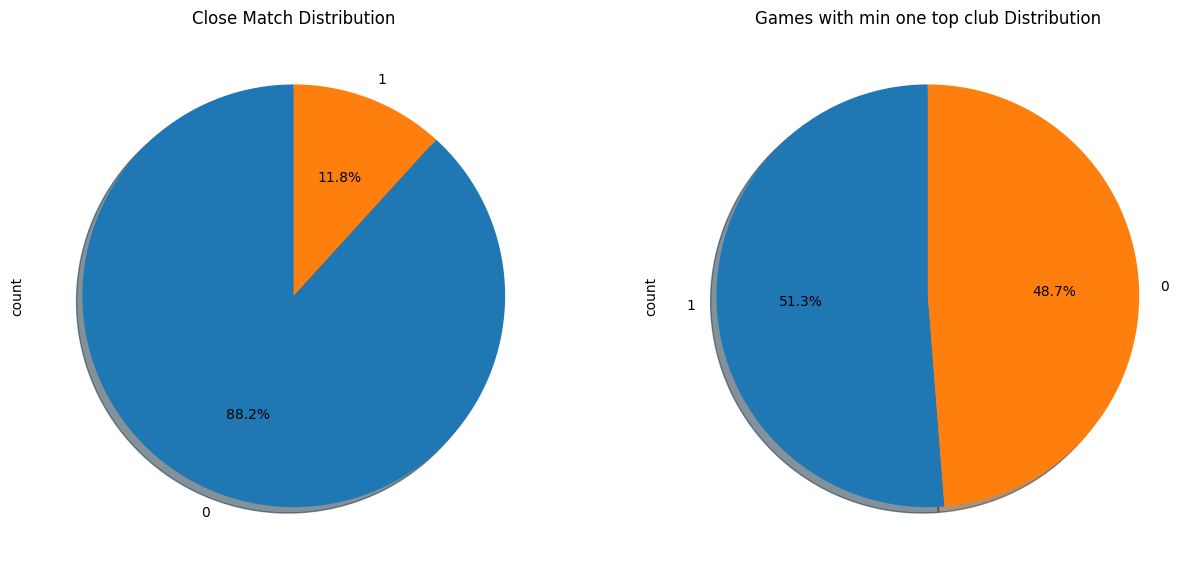

In [8]:
# pie chart of is_close_match and is_top_match
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
df['is_close_match'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, ax=ax[0])
df['has_min_one_top_club'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, ax=ax[1])
ax[0].set_title('Close Match Distribution')
ax[1].set_title('Games with min one top club Distribution')
plt.show()

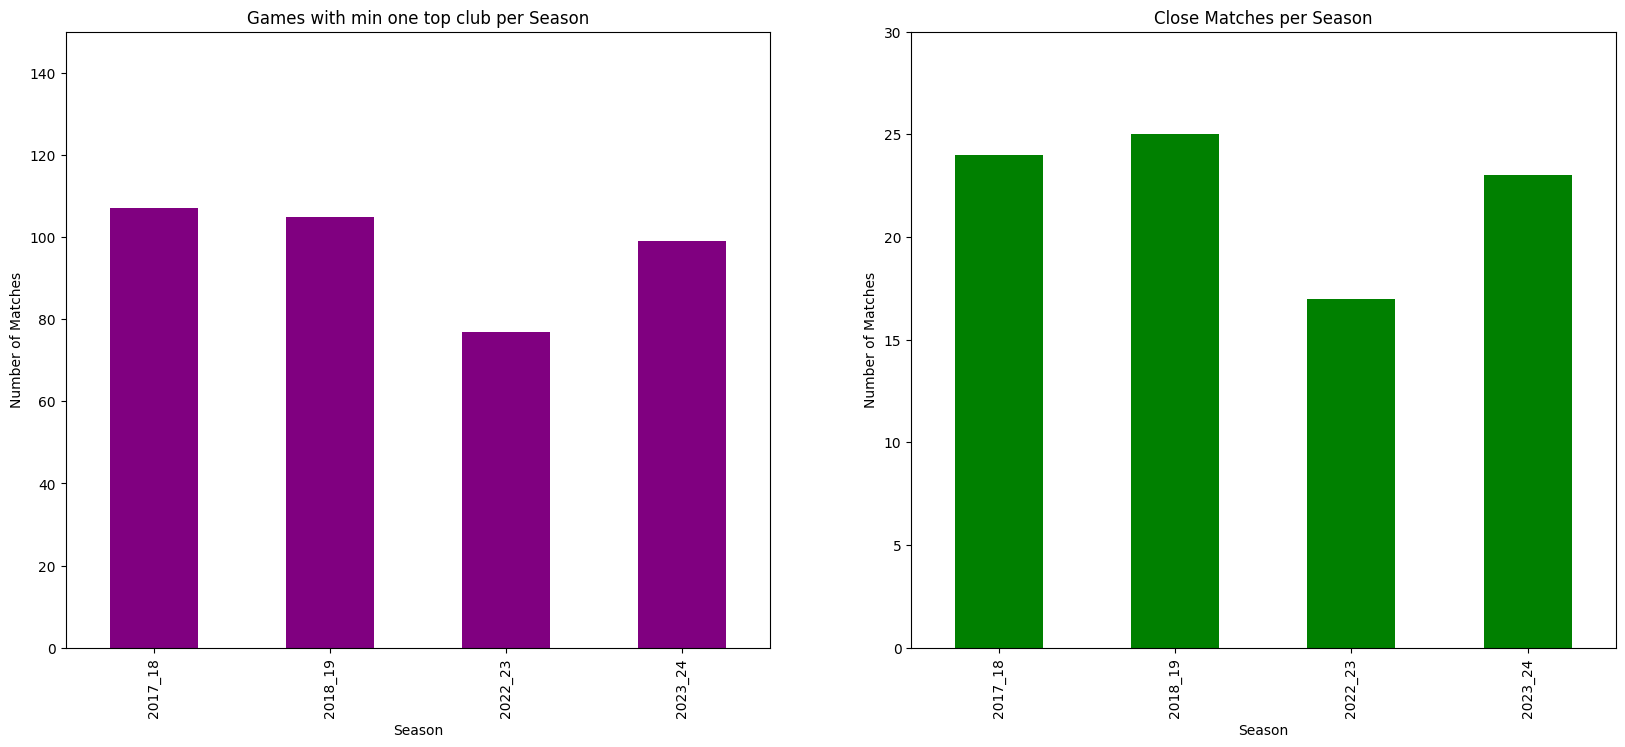

In [13]:
# number of top natches and close matches per season
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
df.groupby('Season')['has_min_one_top_club'].sum().plot(kind='bar', ax=ax[0], color='purple')
df.groupby('Season')['is_close_match'].sum().plot(kind='bar', ax=ax[1], color = 'green')

ax[0].set_title('Games with min one top club per Season')
ax[1].set_title('Close Matches per Season')
ax[0].set_ylabel('Number of Matches')
ax[1].set_ylabel('Number of Matches')

# int values for the y-axis
ax[0].yaxis.get_major_locator().set_params(integer=True)
ax[1].yaxis.get_major_locator().set_params(integer=True)

# same y-axis limits for both plots
ax[0].set_ylim(0, 150)
ax[1].set_ylim(0, 30)

plt.show()

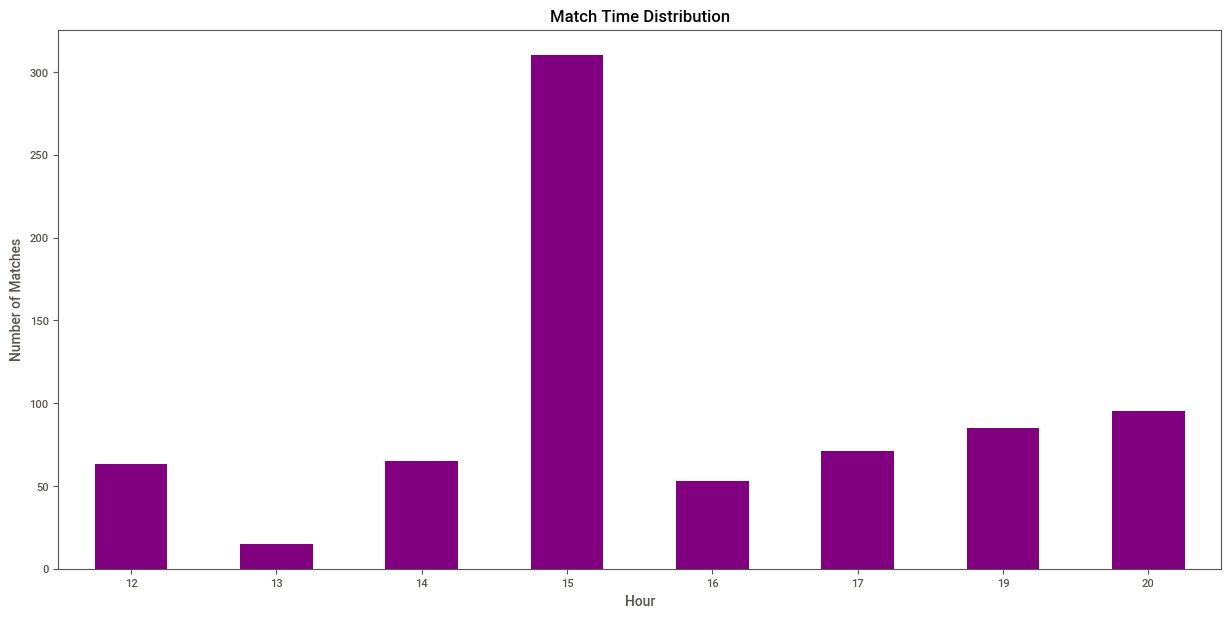

In [67]:
# plot time histogram
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(15, 7), color='purple')
plt.title('Match Time Distribution')
plt.xlabel('Hour')
plt.ylabel('Number of Matches')
#horizontal x axis labels
plt.xticks(rotation=0)
plt.show()

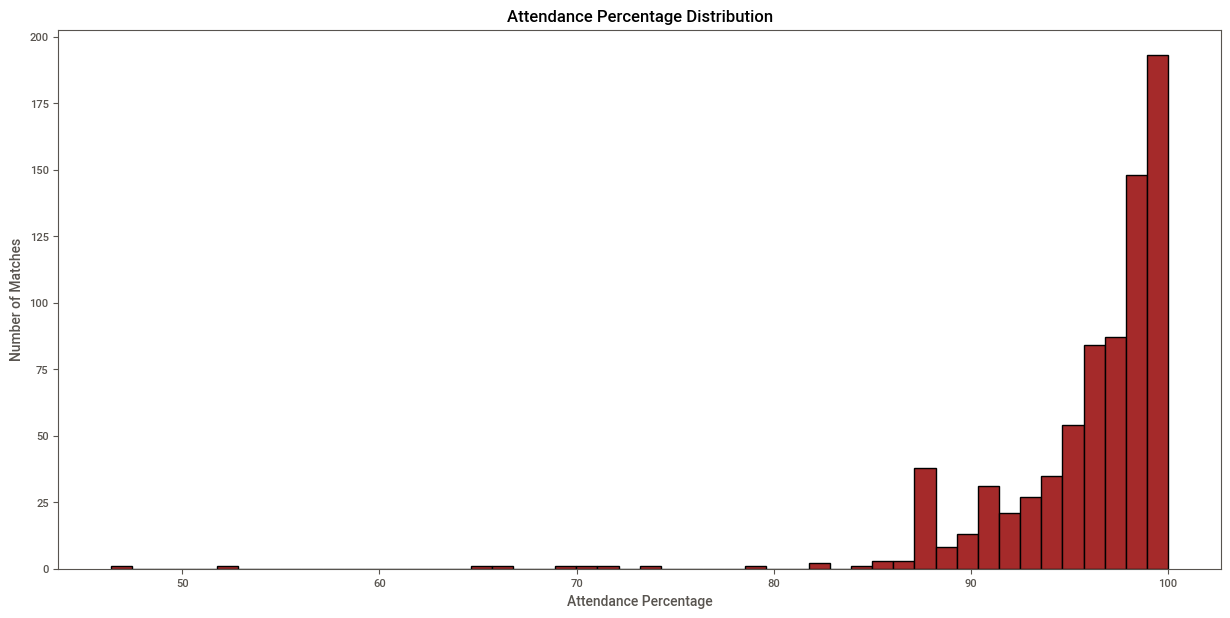

In [70]:
# Attendance percentage
df['Attendance_percentage'].plot(kind='hist', bins=50, figsize=(15, 7), color='brown', edgecolor='black')
plt.title('Attendance Percentage Distribution')
plt.xlabel('Attendance Percentage')
plt.ylabel('Number of Matches')
plt.show()

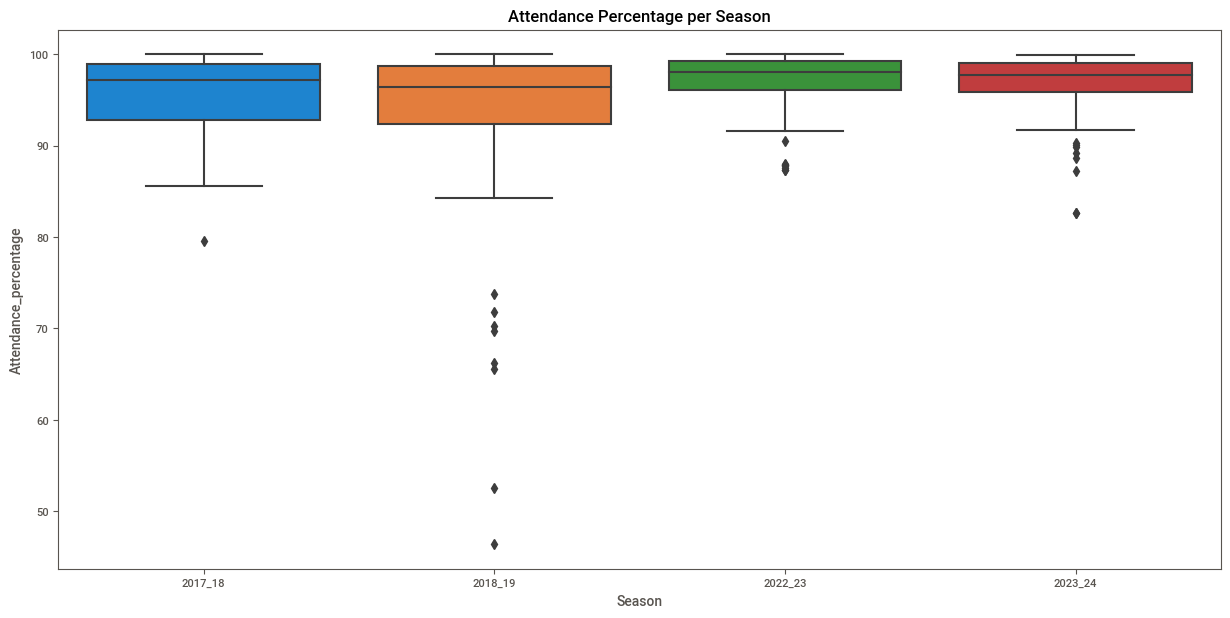

In [72]:
# Attendance percentage per season - boxplot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='Season', y='Attendance_percentage')
plt.title('Attendance Percentage per Season')
plt.show()

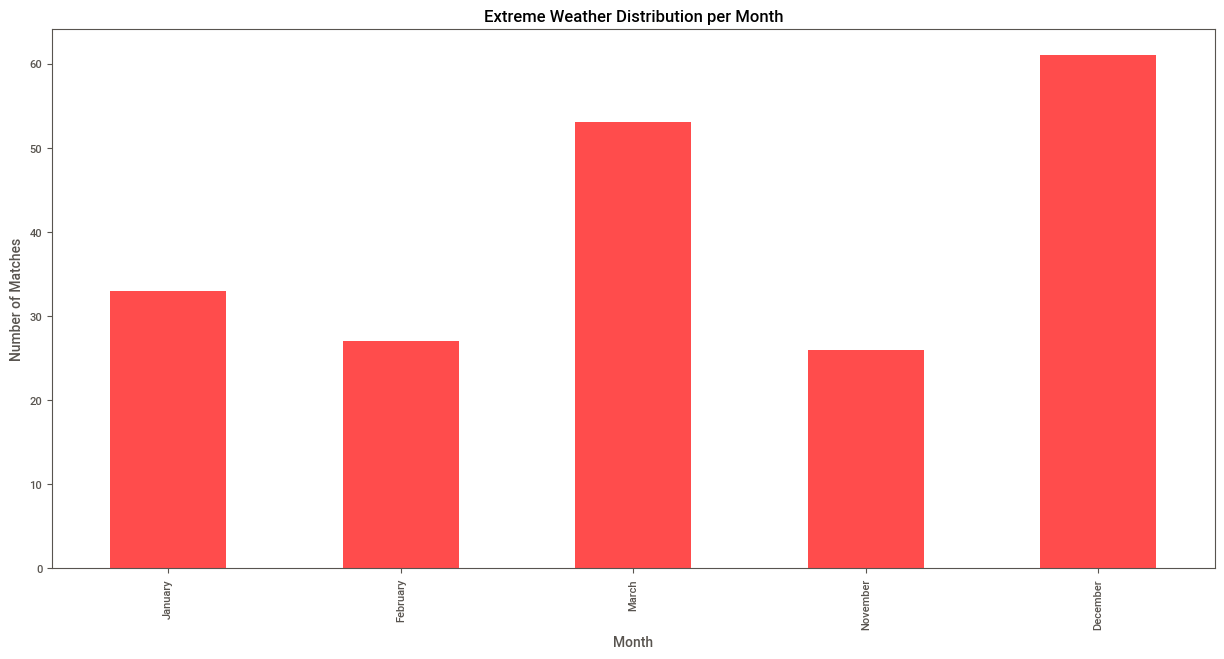

In [77]:
# extreme_weather distribution per month
df['Month'] = pd.DatetimeIndex(df['Date']).month
month_extreme = df.groupby('Month')['had_extreme_weather'].sum().sort_index()
month_extreme.index = month_extreme.index.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
month_extreme.plot(kind='bar', figsize=(15, 7), color='red', alpha=0.7)
plt.title('Extreme Weather Distribution per Month')
plt.ylabel('Number of Matches')
plt.show()

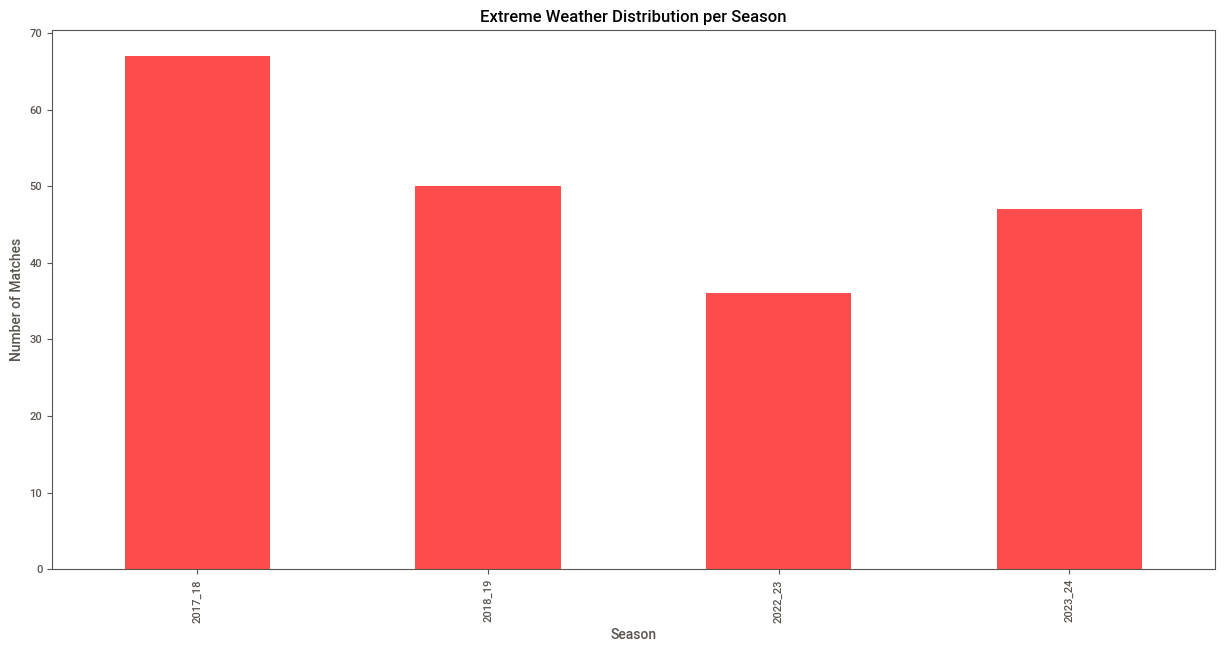

In [78]:
# extreme_weather distribution per season
season_extreme = df.groupby('Season')['had_extreme_weather'].sum()
season_extreme.plot(kind='bar', figsize=(15, 7), color='red', alpha=0.7)
plt.title('Extreme Weather Distribution per Season')
plt.ylabel('Number of Matches')
plt.show()

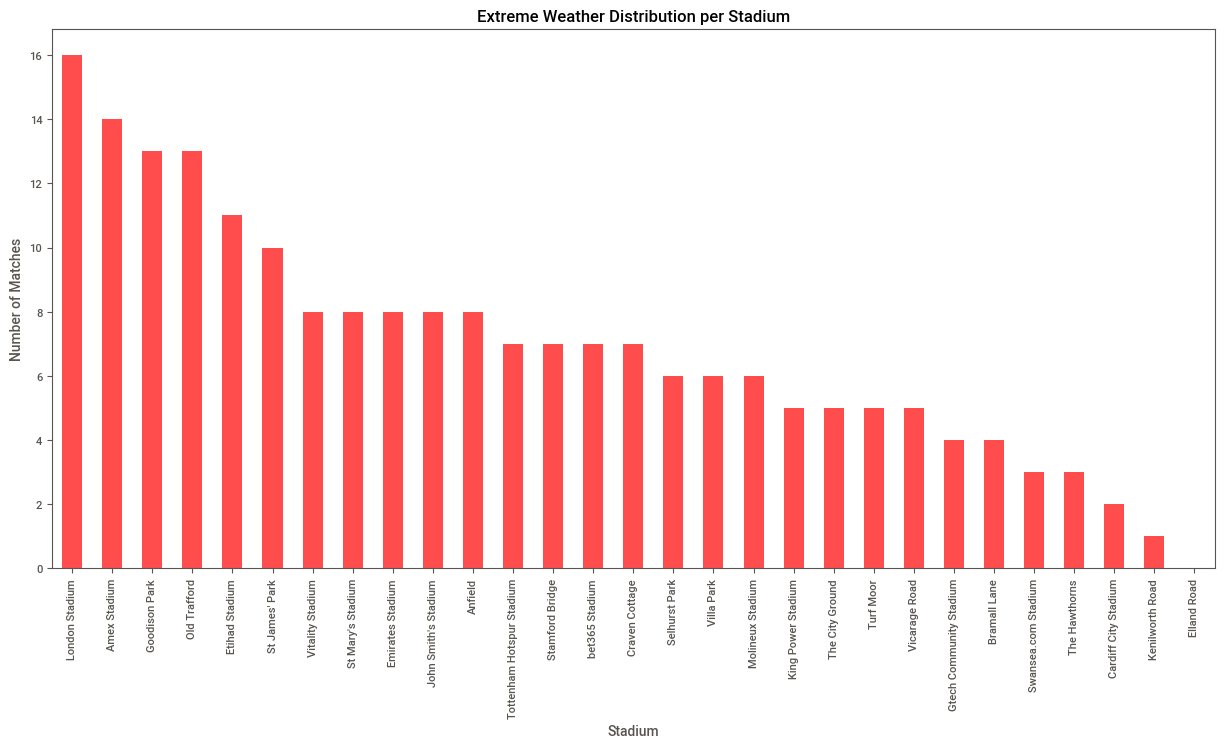

In [81]:
# extreme_weather distribution per football stadium
stadium_extreme = df.groupby('Stadium')['had_extreme_weather'].sum().sort_values(ascending=False)
stadium_extreme.plot(kind='bar', figsize=(15, 7), color='red', alpha=0.7)
plt.title('Extreme Weather Distribution per Stadium')
plt.ylabel('Number of Matches')
plt.show()